# PROBLEM STATEMENT

The Main Aim of this project is to predict the stock prices of a particular company using the stock market dataset.In this project, I am going to use LSTM networks to predict stock prices.It's important to note that there are always other factors that affect the price of stocks ,such as the political atmosphere and the market.However,we won't focus on those factors for this project.This type of problem comes under time series prediction.




In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


# IMPORTING REQUIRED PACKAGES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


# VERSIONS

In [ ]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.18.5
1.0.5
0.10.1


# IMPORTING DATASET

I have downloaded the dataset from kaggle.https://www.kaggle.com/camnugent/sandp500/download


# LOADING THE DATASET

In [ ]:
df = pd.read_csv('My Drive/summer internship/all_stocks_5yr.csv')
df.shape

(619040, 7)

There are 619040 rows and 7 columns in my Dataset

In [ ]:
df.Name.nunique()

505

There are 505 unique companies in "Name" column

# SELECTING A PARTICULAR COMPANY

In [ ]:
data =df[df.Name=='COTY']
data.head()

,date,open,high,low,close,volume,Name
140740,2013-06-13,17.50,17.52,16.90,17.36,46263008,COTY
140741,2013-06-14,17.45,17.55,17.20,17.52,9049475,COTY
140742,2013-06-17,17.61,17.65,17.31,17.39,5489346,COTY
140743,2013-06-18,17.39,17.42,17.16,17.30,6717150,COTY
140744,2013-06-19,17.25,17.35,16.40,17.19,7128541,COTY


I have selected a company named 'COTY'

In [ ]:
data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [ ]:
data = data[['date','low']]
data

,date,low
140740,2013-06-13,16.90
140741,2013-06-14,17.20
140742,2013-06-17,17.31
140743,2013-06-18,17.16
140744,2013-06-19,16.40
...,...,...
141908,2018-02-01,18.64
141909,2018-02-02,18.03
141910,2018-02-05,17.26
141911,2018-02-06,16.50


Selected Date and Low columns

In [ ]:
data.shape

(1173, 2)

In [ ]:
data.describe()

,low
count,1173.000000
mean,20.552763
std,4.722201
min,12.830000
25%,16.710000
50%,18.825000
75%,25.080000
max,32.120000


In [ ]:
data.isnull().sum()

date    0
low     0
dtype: int64

There are no missing values in the Column Date and Low

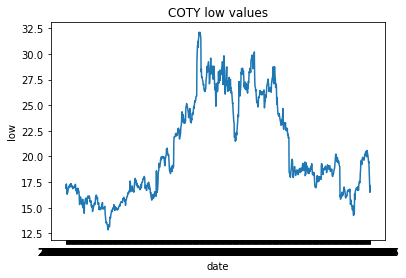

In [ ]:
#line plot
plt.plot(data['date'],data['low'])
plt.title('COTY low values')
plt.xlabel('date')
plt.ylabel('low')
plt.show()

We can observe Uptrends and Downtrends in Low values

In [ ]:
#checking missing values in the data
data.isnull().sum()

date    0
low     0
dtype: int64

In [ ]:
data.date[:15]

140740    2013-06-13
140741    2013-06-14
140742    2013-06-17
140743    2013-06-18
140744    2013-06-19
140745    2013-06-20
140746    2013-06-21
140747    2013-06-24
140748    2013-06-25
140749    2013-06-26
140750    2013-06-27
140751    2013-06-28
140752    2013-07-01
140753    2013-07-02
140754    2013-07-03
Name: date, dtype: object

# CREATING INPUT AND OUTPUT

In [ ]:
## preparing the data
## last 10 days data as input

## X --[[d1-d10],[d2-d11],..]
## y --[d11,d12,...]
X = [] ##input
y = [] ##output
for i in range(data.shape[0]-10-1):
    X.append(data['low'][i:i+10])
    y.append(data['low'][i+140750])
print(X[:3])
print(y[:4])

[140740    16.90
140741    17.20
140742    17.31
140743    17.16
140744    16.40
140745    16.31
140746    16.50
140747    16.46
140748    16.55
140749    16.80
Name: low, dtype: float64, 140741    17.20
140742    17.31
140743    17.16
140744    16.40
140745    16.31
140746    16.50
140747    16.46
140748    16.55
140749    16.80
140750    16.97
Name: low, dtype: float64, 140742    17.31
140743    17.16
140744    16.40
140745    16.31
140746    16.50
140747    16.46
140748    16.55
140749    16.80
140750    16.97
140751    16.91
Name: low, dtype: float64]
[16.97, 16.91, 17.07, 17.1]


Predicting the 11th day value based on the previous 10 days values

In [ ]:
X = np.array(X)

converted into numpy array 

In [ ]:
df1 =pd.DataFrame(X,columns=['d1','d2','d3','d4','d5','d6','d7','d8','d9','d10'])
df1.head()

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
0,16.90,17.20,17.31,17.16,16.40,16.31,16.50,16.46,16.55,16.80
1,17.20,17.31,17.16,16.40,16.31,16.50,16.46,16.55,16.80,16.97
2,17.31,17.16,16.40,16.31,16.50,16.46,16.55,16.80,16.97,16.91
3,17.16,16.40,16.31,16.50,16.46,16.55,16.80,16.97,16.91,17.07
4,16.40,16.31,16.50,16.46,16.55,16.80,16.97,16.91,17.07,17.10


created a dataframe for the values

In [ ]:
df1['d11']=y
df1.head()

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11
0,16.90,17.20,17.31,17.16,16.40,16.31,16.50,16.46,16.55,16.80,16.97
1,17.20,17.31,17.16,16.40,16.31,16.50,16.46,16.55,16.80,16.97,16.91
2,17.31,17.16,16.40,16.31,16.50,16.46,16.55,16.80,16.97,16.91,17.07
3,17.16,16.40,16.31,16.50,16.46,16.55,16.80,16.97,16.91,17.07,17.10
4,16.40,16.31,16.50,16.46,16.55,16.80,16.97,16.91,17.07,17.10,17.14


predicting the next column

# Train test split

In [ ]:
df1.shape

(1162, 11)

In [ ]:
1162 * 0.8

929.6

In [ ]:
## train_test_split
X_train=df1.iloc[:929,:10]
X_test=df1.iloc[929:,:10]
y_train=df1['d11'][:929]
y_test=df1['d11'][929:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(929, 10)
(233, 10)
(929,)
(233,)


# scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_sc=pd.DataFrame(sc.transform(X_train),columns=X_train.columns)
X_test_sc=pd.DataFrame(sc.transform(X_test),columns=X_test.columns)
X_train_sc.describe()

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
count,9.290000e+02,9.290000e+02,9.290000e+02,9.290000e+02,9.290000e+02,9.290000e+02,9.290000e+02,9.290000e+02,9.290000e+02,9.290000e+02
mean,-1.603788e-16,-2.270042e-16,-2.664416e-16,-7.803828e-17,-3.909085e-16,-9.849794e-16,-5.282224e-16,9.301852e-16,2.520409e-16,-2.485752e-17
std,1.000539e+00,1.000539e+00,1.000539e+00,1.000539e+00,1.000539e+00,1.000539e+00,1.000539e+00,1.000539e+00,1.000539e+00,1.000539e+00
min,-1.664968e+00,-1.665924e+00,-1.666611e+00,-1.667245e+00,-1.667804e+00,-1.668793e+00,-1.669940e+00,-1.671038e+00,-1.672100e+00,-1.672963e+00
25%,-9.121443e-01,-9.128766e-01,-9.134028e-01,-9.138889e-01,-9.143133e-01,-9.100875e-01,-9.089594e-01,-9.077995e-01,-9.085955e-01,-9.072494e-01
50%,-2.684251e-01,-2.689662e-01,-2.693548e-01,-2.697151e-01,-2.700242e-01,-2.705507e-01,-2.711667e-01,-2.717672e-01,-2.723413e-01,-2.728009e-01
75%,1.007111e+00,1.006949e+00,1.006833e+00,1.006722e+00,1.006641e+00,1.006537e+00,1.006406e+00,1.006260e+00,1.006132e+00,1.006041e+00
max,2.161640e+00,2.161820e+00,2.161951e+00,2.162066e+00,2.162192e+00,2.162470e+00,2.162777e+00,2.163044e+00,2.163319e+00,2.163561e+00


# RESHAPING THE INPUT DATA

In [ ]:
X_train_sc = X_train_sc.values.reshape(929,10,1)
X_test_sc = X_test_sc.values.reshape(233,10,1)

# BUILDING LSTM MODEL

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
model=Sequential()
model.add(LSTM(256,input_shape=(10,1)))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


# COMPILING THE MODEL

In [ ]:
model.compile(optimizer='adam',loss='mse')

compiled the model with adam  and mse 

# FITTING THE MODEL



In [ ]:
history = model.fit(X_train_sc,y_train,epochs=100,validation_data=(X_test_sc,y_test))

Train on 929 samples, validate on 233 samples
Epoch 1/100
929/929 [==============================] - 3s 3ms/step - loss: 275.5871 - val_loss: 17.2186
Epoch 2/100
929/929 [==============================] - 1s 1ms/step - loss: 26.7819 - val_loss: 14.0905
Epoch 3/100
929/929 [==============================] - 1s 1ms/step - loss: 25.3396 - val_loss: 10.9030
Epoch 4/100
929/929 [==============================] - 1s 1ms/step - loss: 25.4313 - val_loss: 13.4832
Epoch 5/100
929/929 [==============================] - 1s 1ms/step - loss: 25.3122 - val_loss: 13.4533
Epoch 6/100
929/929 [==============================] - 1s 1ms/step - loss: 25.2980 - val_loss: 12.1264
Epoch 7/100
929/929 [==============================] - 1s 1ms/step - loss: 25.6353 - val_loss: 12.1590
Epoch 8/100
929/929 [==============================] - 1s 1ms/step - loss: 25.4113 - val_loss: 15.0108
Epoch 9/100
929/929 [==============================] - 1s 1ms/step - loss: 25.2908 - val_loss: 12.5759
Epoch 10/100
929/929 [====

I have used 100 Epochs

## Plotting the train loss and validation loss on y-axis and epochs on x-axis.

Text(0, 0.5, 'tr_loss and val_loss')

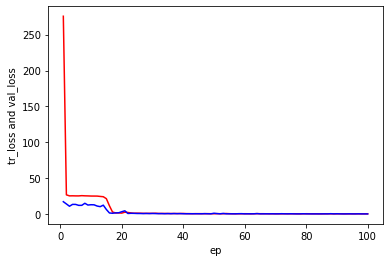

In [ ]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
ep = list(range(1,101))
plt.plot(ep,tr_loss,color='r')
plt.plot(ep,val_loss,color='b')
plt.xlabel('ep')
plt.ylabel('tr_loss and val_loss')

# Evaluating the model with test data


In [ ]:
model.predict(X_test_sc)

array([[18.545895 ],
       [18.540947 ],
       [18.587301 ],
       [18.591793 ],
       [18.63916  ],
       [18.796804 ],
       [18.895489 ],
       [18.875383 ],
       [18.962732 ],
       [19.130415 ],
       [19.150927 ],
       [18.872612 ],
       [18.536837 ],
       [18.393133 ],
       [18.368198 ],
       [18.311745 ],
       [18.247505 ],
       [18.320263 ],
       [18.312593 ],
       [18.240644 ],
       [17.960821 ],
       [17.588268 ],
       [17.335678 ],
       [17.207762 ],
       [17.14338  ],
       [17.098694 ],
       [17.068846 ],
       [17.120485 ],
       [17.271593 ],
       [17.501064 ],
       [17.795174 ],
       [17.944073 ],
       [17.85078  ],
       [17.708017 ],
       [17.709225 ],
       [17.796213 ],
       [17.931782 ],
       [17.998407 ],
       [17.872644 ],
       [17.813475 ],
       [17.900053 ],
       [17.969393 ],
       [18.008505 ],
       [17.982283 ],
       [17.976221 ],
       [17.914537 ],
       [18.357895 ],
       [18.88

# RESULT VISUALIZATION

**Plotting actual and predicted values**

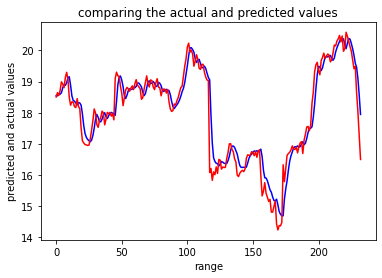

In [ ]:
plt.plot(range(len(X_test_sc)),model.predict(X_test_sc).flat,color='b')
plt.plot(range(len(X_test_sc)),y_test,color='r')
plt.title('comparing the actual and predicted values')
plt.xlabel('range')
plt.ylabel('predicted and actual values')
plt.show()

we can say that predicted and actual values are same from the above graph

# PREDICTION

In [ ]:
X_test_sc[0].reshape(1,10,1)

array([[[-0.42910696],
        [-0.49120954],
        [-0.49164564],
        [-0.56549908],
        [-0.55295545],
        [-0.50094281],
        [-0.47283636],
        [-0.5043165 ],
        [-0.57853865],
        [-0.52339808]]])

In [ ]:
model.predict(X_test_sc[0].reshape(1,10,1))

array([[18.545895]], dtype=float32)

In [ ]:
y_test[929]

18.5029

**CONCLUSION**:




*  I have not used Dropout layer,as there is no overfitting in the data.
*   I have not used another model,because I got model predicted value as 18.54 and actual value as 18.50.Both the values are almost similar.





